## Problem statement:

#### Industry experts can purchase online courses from X Education, an education provider. 
#### Many experts who are interested in the courses visit their website and look through the offerings on any given day.


#### The business must create a model in which each lead must be given a score, 
#### with the goal being to increase the conversion likelihood of clients 
#### with higher lead scores and decrease it for those with lower lead scores. 
#### The intended lead conversion rate, as stated by the CEO in particular, is approximately 80%.

### 1. Import Necessary files and data for analysis

In [1]:
#import the necessary libraries .
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [2]:
# Now we need to read data from given file 'Leads.csv'

ld = pd.read_csv('Leads.csv')
ld.head(6)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified


### 2. Inspect the given data

In [3]:
# Check on datatypes of each column in given dataframe
ld.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#Check on shape of the dataframe
ld.shape

(9240, 37)

In [5]:
#Now we need to look at the description of dataframe
ld.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Inference: We can see from the preceding table that there are outliers in the columns labeled  "Total Time Spent on Website", "Page Views Per Visit" and "TotalVisits".

In [6]:
# Replacing 'Select' value in important columns with NaN value
ld['City'] = ld['City'].replace('Select', np.NaN)

ld['Specialization'] = ld['Specialization'].replace('Select', np.NaN)

ld['How did you hear about X Education'] = ld['How did you hear about X Education'].replace('Select', np.NaN)

### 3.1. Interpret and analyzing missing values in dataframe

In [7]:
# Find the count of null values in the given dataframe
ld.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Determine percentage composition of null values in individual columns
nc = (ld.isnull().sum() / len(ld.index)).apply(lambda x: round(100 * x, 2))
print(nc)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Now lets find columns having composition of more than 40% of null values
print(nc[nc>=40])

How did you hear about X Education    78.46
Lead Quality                          51.59
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64


#### Inference: We may conclude from our study of these columns that they contain over 40% missing values and are not necessary for further investigation. We can therefore remove these columns.

In [10]:
# Now we will drop this columns
dc = nc[nc >= 40].index
ld.drop(columns=dc, inplace=True)

In [11]:
# Now lets check the shape again of the dataframe
ld.shape

(9240, 31)

### 3.2. Check binary variables in dataframe

In [12]:
columns_to_check = ['Through Recommendations', 'Digital Advertisement', 'Do Not Call', 'Do Not Email', 
                    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
                    'I agree to pay the amount through cheque', 'Get updates on DM Content', 
                    'Receive More Updates About Our Courses', 'Newspaper', 'Update me on Supply Chain Content']

for column in columns_to_check:
    print(f"Value counts for column '{column}':")
    print(ld[column].value_counts())
    print()

Value counts for column 'Through Recommendations':
No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Value counts for column 'Digital Advertisement':
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Value counts for column 'Do Not Call':
No     9238
Yes       2
Name: Do Not Call, dtype: int64

Value counts for column 'Do Not Email':
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Value counts for column 'Search':
No     9226
Yes      14
Name: Search, dtype: int64

Value counts for column 'Magazine':
No    9240
Name: Magazine, dtype: int64

Value counts for column 'Newspaper Article':
No     9238
Yes       2
Name: Newspaper Article, dtype: int64

Value counts for column 'X Education Forums':
No     9239
Yes       1
Name: X Education Forums, dtype: int64

Value counts for column 'I agree to pay the amount through cheque':
No    9240
Name: I agree to pay the amount through cheque, dtype: int64

Value counts for column 'Get updates on DM Conte

### 3.3. Drop skew columns

In [13]:
# Let's drop all the skewed columns and check the remaining columns later for the dataframe
sc = ['Magazine','Newspaper Article','Do Not Call','Search','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Update me on Supply Chain Content',
               'I agree to pay the amount through cheque','Do Not Email','Get updates on DM Content']
ld.drop(sc, axis = 1, inplace = True)
ld.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### 4.1. Impute missing values in dataframe for "Lead Source" column

In [14]:
# Impute for 'Lead Quality' column

ld['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [15]:
# Replace Na vlaues with mode of the column
ld['Lead Source'] = np.where(ld['Lead Source'].isna(), ld['Lead Source'].mode()[0], ld['Lead Source'])

#### Inference: As we can see from the above, the majority of the categories contribute less than 10%, hence we can group them all together under the heading of social media. 

In [16]:
ld['Lead Source'] = [source if source in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference'] else 'Social Media' for source in ld['Lead Source']]

In [17]:
ld.groupby('Lead Source').size().div(len(ld)) * 100

Lead Source
Direct Traffic    27.521645
Google            31.428571
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Social Media       3.787879
dtype: float64

In [18]:
# Lastly lets check all Null Values
ld['Lead Source'].isnull().sum()

0

### 4.2. Impute missing values in dataframe for "City" column

In [19]:
# Impute for 'TotalVisits' column

ld['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Inference: To make things easier to comprehend, we can label Thane and its suburbs as Tier II cities, Mumbai and other metropolises as Tier I cities, and other cities in Maharashtra as Tier III cities.

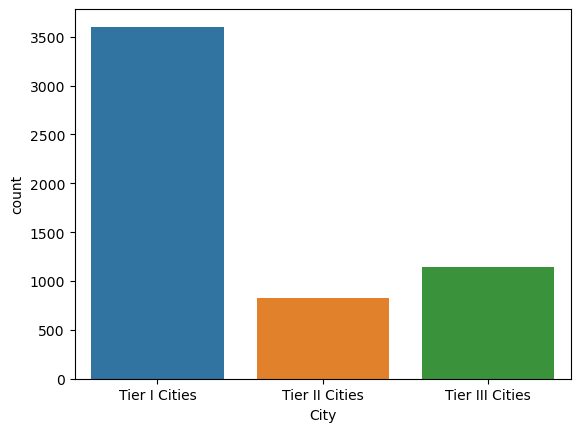

In [20]:
ld.City = ['Tier I Cities' if city == 'Mumbai' or city == 'Other Metro Cities' else 'Tier II Cities' if city == 'Thane & Outskirts' else 'Tier III Cities' if city == 'Other Cities' or city == 'Other Cities of Maharashtra' else city for city in ld.City]

# Convert 'City' column to categorical type
ld['City'] = pd.Categorical(ld['City'], categories=['Tier I Cities', 'Tier II Cities', 'Tier III Cities'])

# Plot count using seaborn, specifying categorical ordering
sns.countplot(data=ld, x='City', order=['Tier I Cities', 'Tier II Cities', 'Tier III Cities'])
plt.show()

In [21]:
ld['City'].value_counts()

Tier I Cities      3602
Tier III Cities    1143
Tier II Cities      826
Name: City, dtype: int64

#### Inference: Since 'Tier I Cities' have the greatest frequency of occurrences in the graph above, we will impute 'Mumbai' to fill in the missing data. Also,since City columns provides more data than Country columns, we are removing Country columns because Country columns seems useless. 

In [22]:
# Hence, now we will impute 'Mumbai' in place of missing values and check on missing values later

ld["City"].fillna("Tier I Cities", inplace = True)
ld.drop(['Country'], axis = 1, inplace = True)
ld['City'].isnull().sum()

0

### 4.3. Impute missing values in dataframe for "What is your current occupation" column

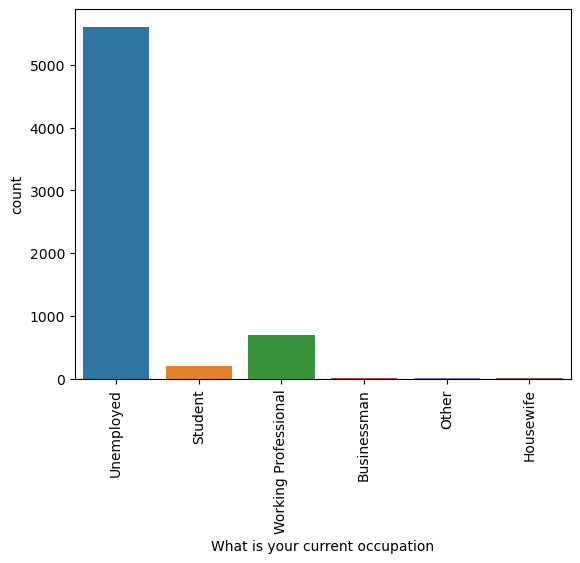

In [23]:
#Lets plot the count of all attributes in this column
sns.countplot(x=ld['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [24]:
# Check on the count numerically
ld['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Inference: From the above graph, we can see that 'Unemployed', followed by 'Working Professional' and 'Student' have the highest number of occurrences, so we will attribute them randomly instead of missing values. 

In [25]:
# Fill missing values in 'What is your current occupation' column with 'XNA'
ld['What is your current occupation'].fillna('XNA', inplace=True)

# Define the list of random occupations
random_occupation = ['Unemployed', 'Working Professional', 'Student']

# Replace 'XNA' values with random occupations from the provided list
ld['What is your current occupation'] = ld['What is your current occupation'].apply(lambda x: random.choice(random_occupation) if x == 'XNA' else x)

# Sort the DataFrame by 'What is your current occupation' column in descending order
ld = ld.sort_values(by='What is your current occupation', ascending=False)

# Count the occurrences of each occupation
ld['What is your current occupation'].value_counts()

Unemployed              6489
Working Professional    1615
Student                 1102
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Lastly, check on missing values of the column
ld['What is your current occupation'].isnull().sum()

0

In [27]:
# Now let's concatinate "Housewife" and "Businessman" with "Other"
ld['What is your current occupation'] = ['Other' if x == 'Housewife' or x == 'Businessman' else x for x in ld['What is your current occupation']]

### 4.4. Impute missing values in dataframe for "Specialization" column

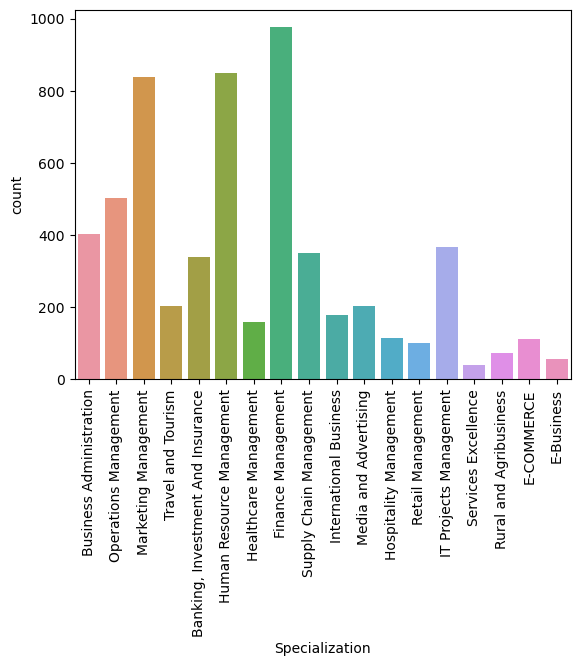

In [28]:
sns.countplot(x=ld['Specialization'])
xticks(rotation = 90)
plt.show()

In [29]:
# Lets impute for 'Specialization' column
ld['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

#### Inference: From the above graph, we can see that ‘Finance Management’, followed by ‘HR Management’, ‘Marketing Management’ and ‘Operations Management’ have the highest number of occurrences, so we will attribute them randomly instead of missing values.

In [30]:
random_Specializations = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management']
ld.Specialization = [random.choice(random_Specializations) if spec == 'XNA' else spec for spec in ld.Specialization]

#### Inference: We can categorize the Specialization column to improve clarity. Except for Finance Management, Human Resource Management, Marketing Management, and Operations Management, all other specializations will be grouped under the 'Other' category for easier comprehension.

In [31]:
valid_specializations = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management']
ld.Specialization = ['Other' if spec not in valid_specializations else spec for spec in ld.Specialization]

In [32]:
# Check on the imputed values now for 'Specialization' column
ld['Specialization'].value_counts()

Other                        6075
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [33]:
# Check on missing values count in the column
ld['Specialization'].isnull().sum()

0

### 4.5. Impute missing values in dataframe for "What matters most to you in choosing a course" column

In [34]:
# Lets impute for 'What matters most to you in choosing a course' column
ld['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
# "What matters most to you in choosing a course" columns gives no information to us so we are dropping this column
ld.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

### 4.5. Impute missing values in dataframe for "Total Visits" column

In [36]:
#Let's look up on "Total Visits" value count
ld['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
26.0        2
28.0        2
29.0        2
42.0        1
55.0        1
30.0        1
32.0        1
54.0        1
115.0       1
41.0        1
74.0        1
251.0       1
141.0       1
43.0        1
Name: TotalVisits, dtype: int64

In [37]:
# Imputing values in "Total Visits" using Median. Later check on sum of null values in the column
median_total_visits = ld['TotalVisits'].median()
ld['TotalVisits'].fillna(round(median_total_visits, 2), inplace=True)
ld['TotalVisits'].isnull().sum()

0

In [38]:
# As the Lead number and Prospect ID convey identical information, we're opting to discard the 'Lead Number' column since it contains numeric values.
ld.drop(['Lead Number'], axis = 1, inplace = True)

### 5. Categorical Variables Analysis

In [39]:
# Let's look at count of values in "Lead Origin"
ld['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [40]:
# Incorporating 'Lead Import' and 'Quick Add Form' into the 'Lead Add Form' to enhance clarity and convenience. Later calculate count of values.
ld['Lead Origin'] = ['Lead Add Form' if (value == 'Lead Import' or value == 'Quick Add Form') else value for index, value in enumerate(ld['Lead Origin'])]
ld['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               8.376623
Name: Lead Origin, dtype: float64

### 6.1. EDA: Assigning numerical values to the variable 'A free copy of Mastering The Interview,' where 'Yes' corresponds to 1 and 'No' corresponds to 0.

In [41]:
# Defining a mapping for two categories
category_mapping = {"No": 0, "Yes": 1}

# Applying the mapping to 'A free copy of Mastering The Interview' column
ld['A free copy of Mastering The Interview'] = ld['A free copy of Mastering The Interview'].replace(category_mapping)

# Now we are looking at "Converted" being the target variable
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 4784 to 7126
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Prospect ID                             9240 non-null   object  
 1   Lead Origin                             9240 non-null   object  
 2   Lead Source                             9240 non-null   object  
 3   Converted                               9240 non-null   int64   
 4   TotalVisits                             9240 non-null   float64 
 5   Total Time Spent on Website             9240 non-null   int64   
 6   Page Views Per Visit                    9103 non-null   float64 
 7   Last Activity                           9137 non-null   object  
 8   Specialization                          9240 non-null   object  
 9   What is your current occupation         9240 non-null   object  
 10  Tags                                    5887 

### 6.1.1. Multivariate Analysis: For 'Lead Origin'

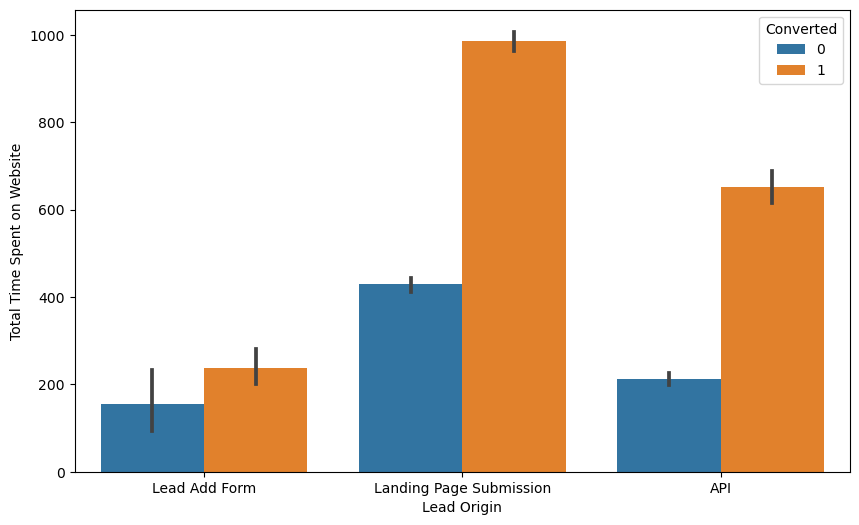

In [42]:
# Plot for Lead Origin Variable Comparison
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Lead Origin", hue="Converted", y='Total Time Spent on Website', data=ld, ax=ax)
plt.show()

#### Inferences: 

#### The data indicates that both API and Landing Page Submission generate the highest number of leads and conversions.
#### Although the Lead Add Form yields fewer leads, its conversion rate is notably higher.
#### Based on these findings, there's a need to focus on increasing leads from the Lead Add Form and enhancing the conversion rates of leads from the API and Landing Page Submission sources to boost the overall lead conversion rate." 

### 6.1.2. Multivariate Analysis: For 'Lead Source'

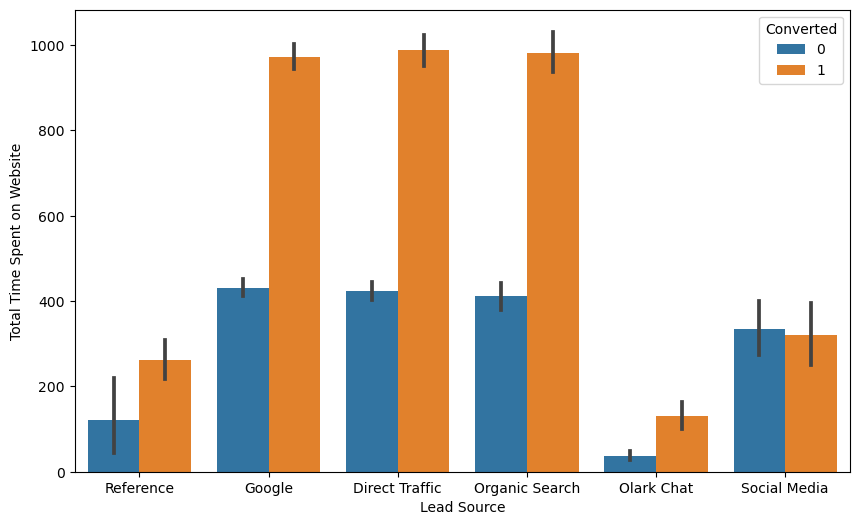

In [43]:
# Plot for Lead Source Variable Comparison
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Lead Source", hue="Converted", y='Total Time Spent on Website', data=ld, ax=ax)
plt.show()

#### Inferences:

####  Organic Search, Direct Traffic, and Google show a notable conversion rate.
####  Reference and Olark Chat stand out for generating the highest number of leads.
####  Social Media exhibits the lowest conversion rate among the channels analyzed.

#### Implications:

#### Based on these findings, it is evident that our attention should be directed towards enhancing the conversion rates of leads originating from Social Media, Organic Search, Direct Traffic, and Google. 

### 6.1.3. Multivariate Analysis: For 'City' 

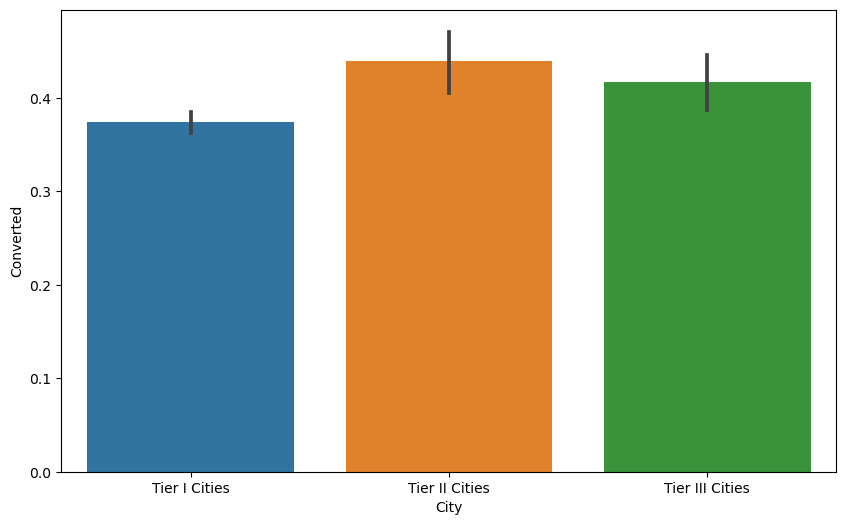

In [44]:
# Plot for City Variable Comparison
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="City", y='Converted', data=ld, ax=ax)
plt.show()

#### Inferences: Cities categorized as Tier I, Tier II, and Tier III hold equal significance in the analysis process.

### 6.1.4. Multivariate Analysis: For 'Last Activity' 

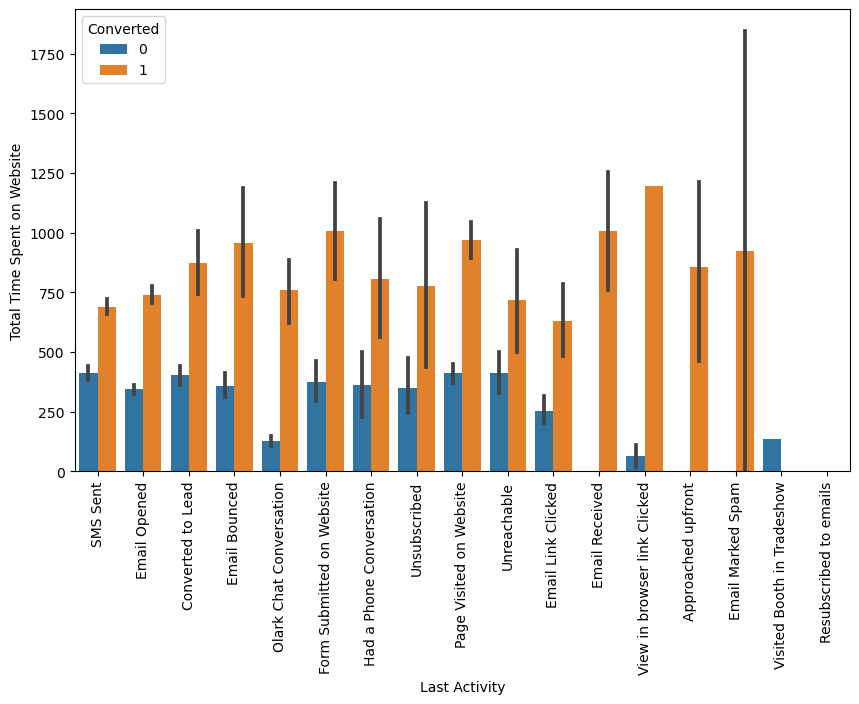

In [45]:
# Plot for Last Activity Variable Comparison
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Last Activity", hue="Converted", y='Total Time Spent on Website', data=ld, ax=ax)
xticks(rotation = 90)
plt.show()

#### Inferences: The highest conversion rate is observed for View in browser link clicked, surpassing all others, followed by Olark Chat Conversation.

### 6.1.5. Multivariate Analysis: For 'What is your current occupation' 

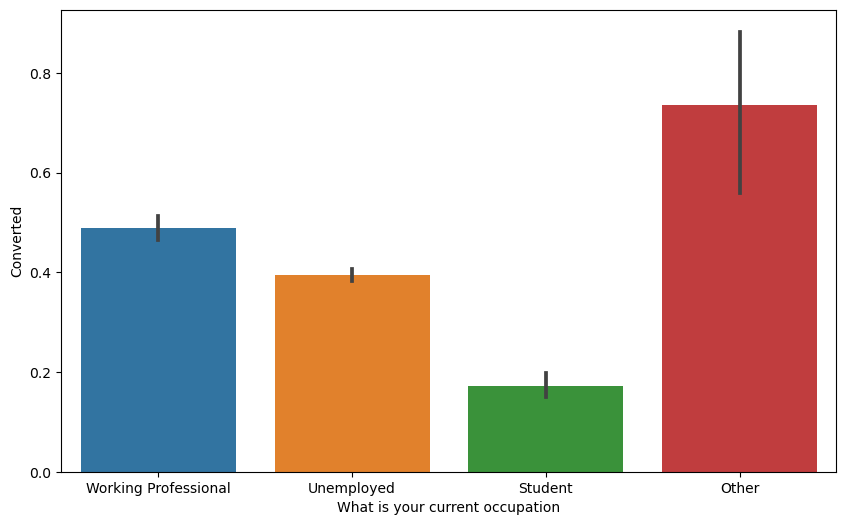

In [46]:
# Plot for what is your current occupation variable comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=ld["What is your current occupation"], y=ld["Converted"])
plt.show()

#### Inferences: The largest group consists of individuals categorized as 'Other', with 'Working Professional' being the next most numerous.

### 6.1.6. Numerical Analysis of Variables 

<Figure size 2400x2400 with 0 Axes>

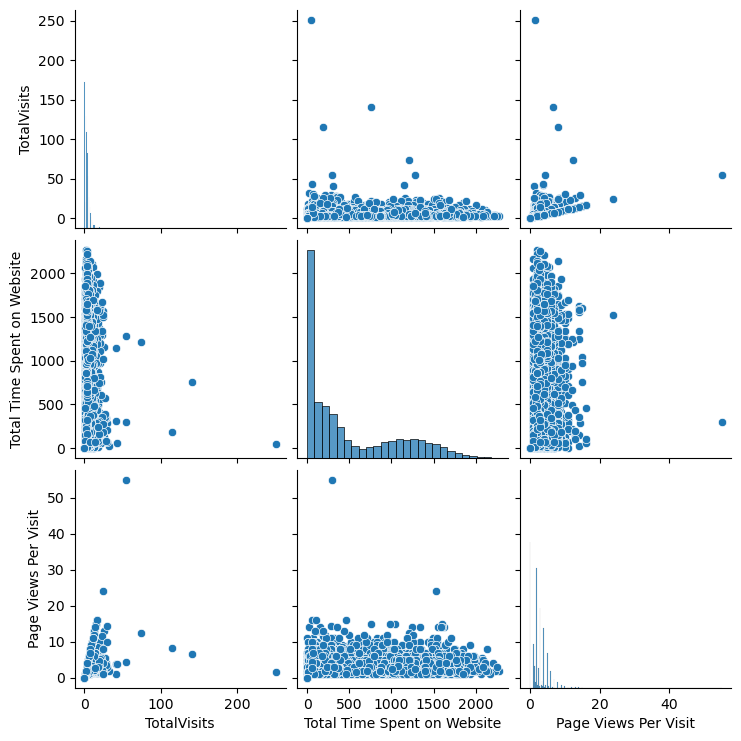

In [47]:
num_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set the figure size
plt.figure(figsize=(24, 24))

# Create pairplot
sns.pairplot(data=ld[num_columns])

# Show the plot
plt.show()

In [48]:
#Dropping redundant columns from dataframe
ld.drop(['Last Activity', 'Lead Profile', 'Last Notable Activity', 'Tags'], axis=1, inplace=True)
ld.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
4784,c2094c66-5ff2-4859-88a2-3250ccb966a5,Lead Add Form,Reference,1,0.0,0,0.0,Other,Working Professional,Tier I Cities,0
1254,7a37f0c1-a37e-49e8-9a5c-0d0c69eb8e3d,Landing Page Submission,Google,1,6.0,1040,6.0,Operations Management,Working Professional,Tier III Cities,0
3926,d3c5bcb2-4131-4531-ab75-9a58d070ac1d,Landing Page Submission,Direct Traffic,1,2.0,1520,2.0,Marketing Management,Working Professional,Tier I Cities,1
1283,ff9028a4-96b7-40ba-b615-f69054cccd07,Landing Page Submission,Organic Search,1,18.0,1569,4.5,Other,Working Professional,Tier I Cities,0
2302,112b6c91-779b-408e-b759-1c8aeb6e2422,API,Organic Search,0,3.0,1182,3.0,Other,Working Professional,Tier I Cities,0


### 6.2. Univariate Analysis of Variables 

In [49]:
# Let's describe the data frame again
ld.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362820,0.312554
std,0.486714,4.819024,548.021466,2.161418,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000


### 6.2.1. Univariate Analysis: For 'Total Visits' column

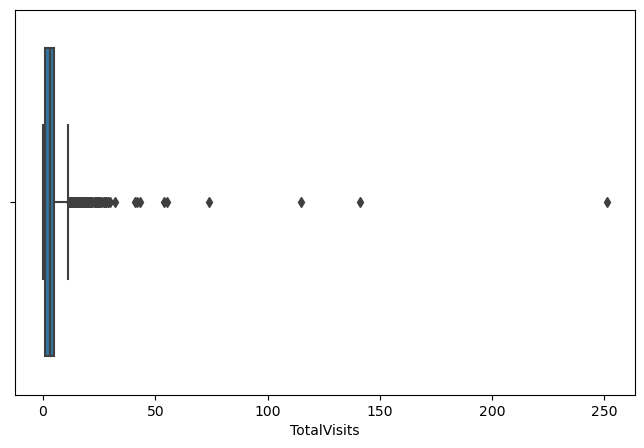

In [50]:
# Plot for determining total visits outlier distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=ld['TotalVisits'])
plt.show()

#### Inference: In analysis, we observe outliers in the 'Page Views Per Visit' and 'TotalVisits' columns, necessitating treatment. To address this issue, we can establish a threshold where customers are assumed not to have visited the website more than 35 times.

In [51]:
#Check the shape of dataframe to confirm the threshold
ld = ld[ld.TotalVisits < 35]
ld.shape

(9231, 11)

### 6.2.2. Univariate Analysis: For 'Total Visits' , 'Page Views per Visit' and 'Total Time Spent on Website' column

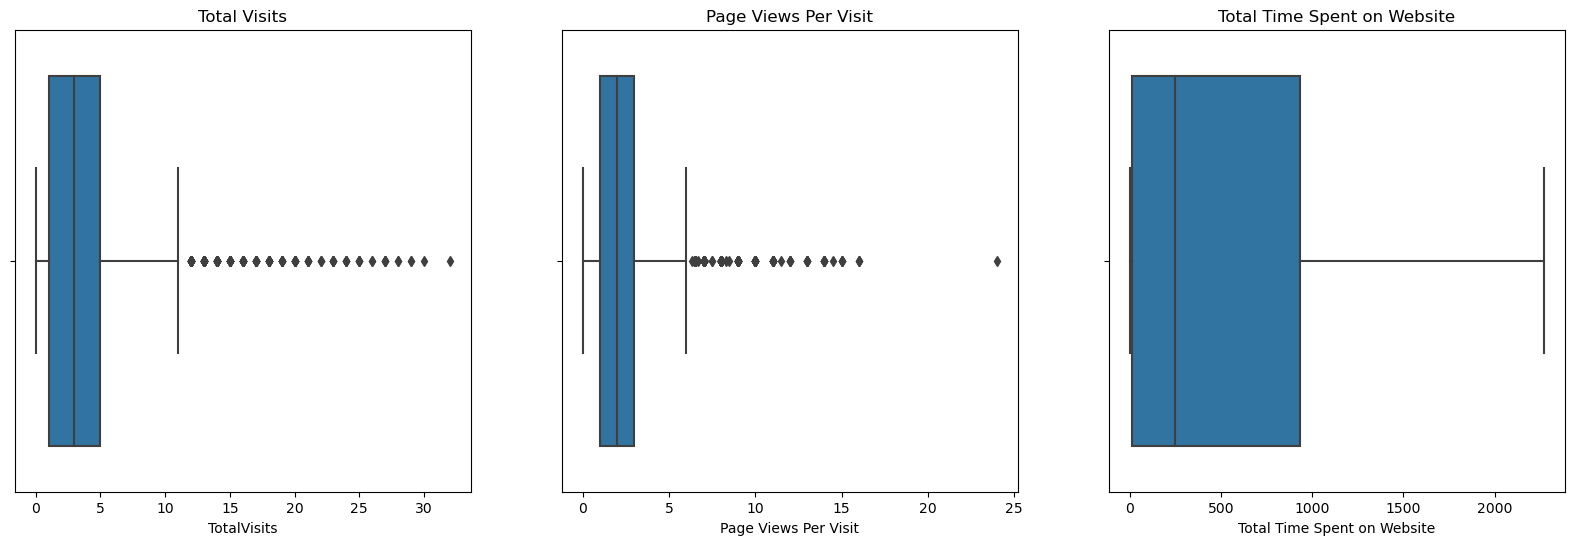

In [52]:
# Plot for determining 'Total Visits' , 'page views per visit' , 'Total Time Spent on Website' outlier distribution
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(ax=axes[0], x=ld['TotalVisits'])
axes[0].set_title('Total Visits')

sns.boxplot(ax=axes[1], x=ld['Page Views Per Visit'])
axes[1].set_title('Page Views Per Visit')

sns.boxplot(ax=axes[2], x=ld['Total Time Spent on Website'])
axes[2].set_title('Total Time Spent on Website')

plt.show()

In [53]:
# Let's find the percentage of null values composition in all columns
null_count = round(100*(ld.isnull().sum()/len(ld.index)),2)
null_count

Prospect ID                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [54]:
# Impute missing values in "Page Views Per Visit" with the mean
mean_page_views_per_visit = ld['Page Views Per Visit'].mean()
ld['Page Views Per Visit'].fillna(mean_page_views_per_visit, inplace=True)

In [55]:
# Finally, let's find the percentage of null values composition in all columns
null_count = round(100*(ld.isnull().sum()/len(ld.index)),2)
null_count

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### 7.1. Data Preperation: Generate binary indicators(dummy variables) for certain categorical variables

In [56]:
#Create dummy variables
columns_needed = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City']
d_ld = pd.get_dummies(ld[columns_needed], drop_first=True)
d_ld.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
4784,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1254,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3926,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1283,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2302,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [57]:
# Adding the results To lead data set
ld = pd.concat([ld, d_ld], axis=1)
ld.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
4784,c2094c66-5ff2-4859-88a2-3250ccb966a5,Lead Add Form,Reference,1,0.0,0,0.0,Other,Working Professional,Tier I Cities,...,0,0,0,0,1,0,0,1,0,0
1254,7a37f0c1-a37e-49e8-9a5c-0d0c69eb8e3d,Landing Page Submission,Google,1,6.0,1040,6.0,Operations Management,Working Professional,Tier III Cities,...,0,0,0,1,0,0,0,1,0,1
3926,d3c5bcb2-4131-4531-ab75-9a58d070ac1d,Landing Page Submission,Direct Traffic,1,2.0,1520,2.0,Marketing Management,Working Professional,Tier I Cities,...,0,0,1,0,0,0,0,1,0,0
1283,ff9028a4-96b7-40ba-b615-f69054cccd07,Landing Page Submission,Organic Search,1,18.0,1569,4.5,Other,Working Professional,Tier I Cities,...,0,0,0,0,1,0,0,1,0,0
2302,112b6c91-779b-408e-b759-1c8aeb6e2422,API,Organic Search,0,3.0,1182,3.0,Other,Working Professional,Tier I Cities,...,0,0,0,0,1,0,0,1,0,0


In [58]:
# Drop certain columns considered not necessary for analysis
ld = ld.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis = 1)
ld.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
4784,c2094c66-5ff2-4859-88a2-3250ccb966a5,1,0.0,0,0.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1254,7a37f0c1-a37e-49e8-9a5c-0d0c69eb8e3d,1,6.0,1040,6.0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3926,d3c5bcb2-4131-4531-ab75-9a58d070ac1d,1,2.0,1520,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1283,ff9028a4-96b7-40ba-b615-f69054cccd07,1,18.0,1569,4.5,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2302,112b6c91-779b-408e-b759-1c8aeb6e2422,0,3.0,1182,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### 7.2. Splitting the dataset

In [59]:
# Split the data into train and test samples
df_train, df_test = train_test_split(ld, train_size = 0.7, random_state = 100)

### 7.3. Features Scaling

In [60]:
#Now scale the features for the numerical columns
scaler = MinMaxScaler()
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
7949,3d45b66a-03bd-4808-bc4d-2969a57c451d,1,0.09375,0.672975,0.125000,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1611,c8998352-a39e-42ae-85cd-661c9c1a34b4,1,0.15625,0.132042,0.208333,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
6886,14492e02-dd67-4aa8-a7ce-7dbfa629588e,0,0.15625,0.168574,0.208333,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1590,5f98ae85-3c6c-496a-9a70-40ee2d906c63,0,0.00000,0.000000,0.000000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
907,ceb2b9e9-9a24-47e8-bf2b-9dadcd3f8e46,1,0.09375,0.343750,0.125000,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [61]:
# Check on the sample sizes post assignment of this variables
y_train = df_train.Converted
X_train = df_train.drop(['Converted','Prospect ID'],axis =1)
y_test = df_test.Converted
X_test = df_test.drop(['Converted','Prospect ID'],axis =1)

In [62]:
X_test.shape

(2770, 20)

In [63]:
X_train.shape

(6461, 20)

In [64]:
y_test.shape

(2770,)

In [65]:
y_train.shape

(6461,)

### 7.4. Dataset correlation 

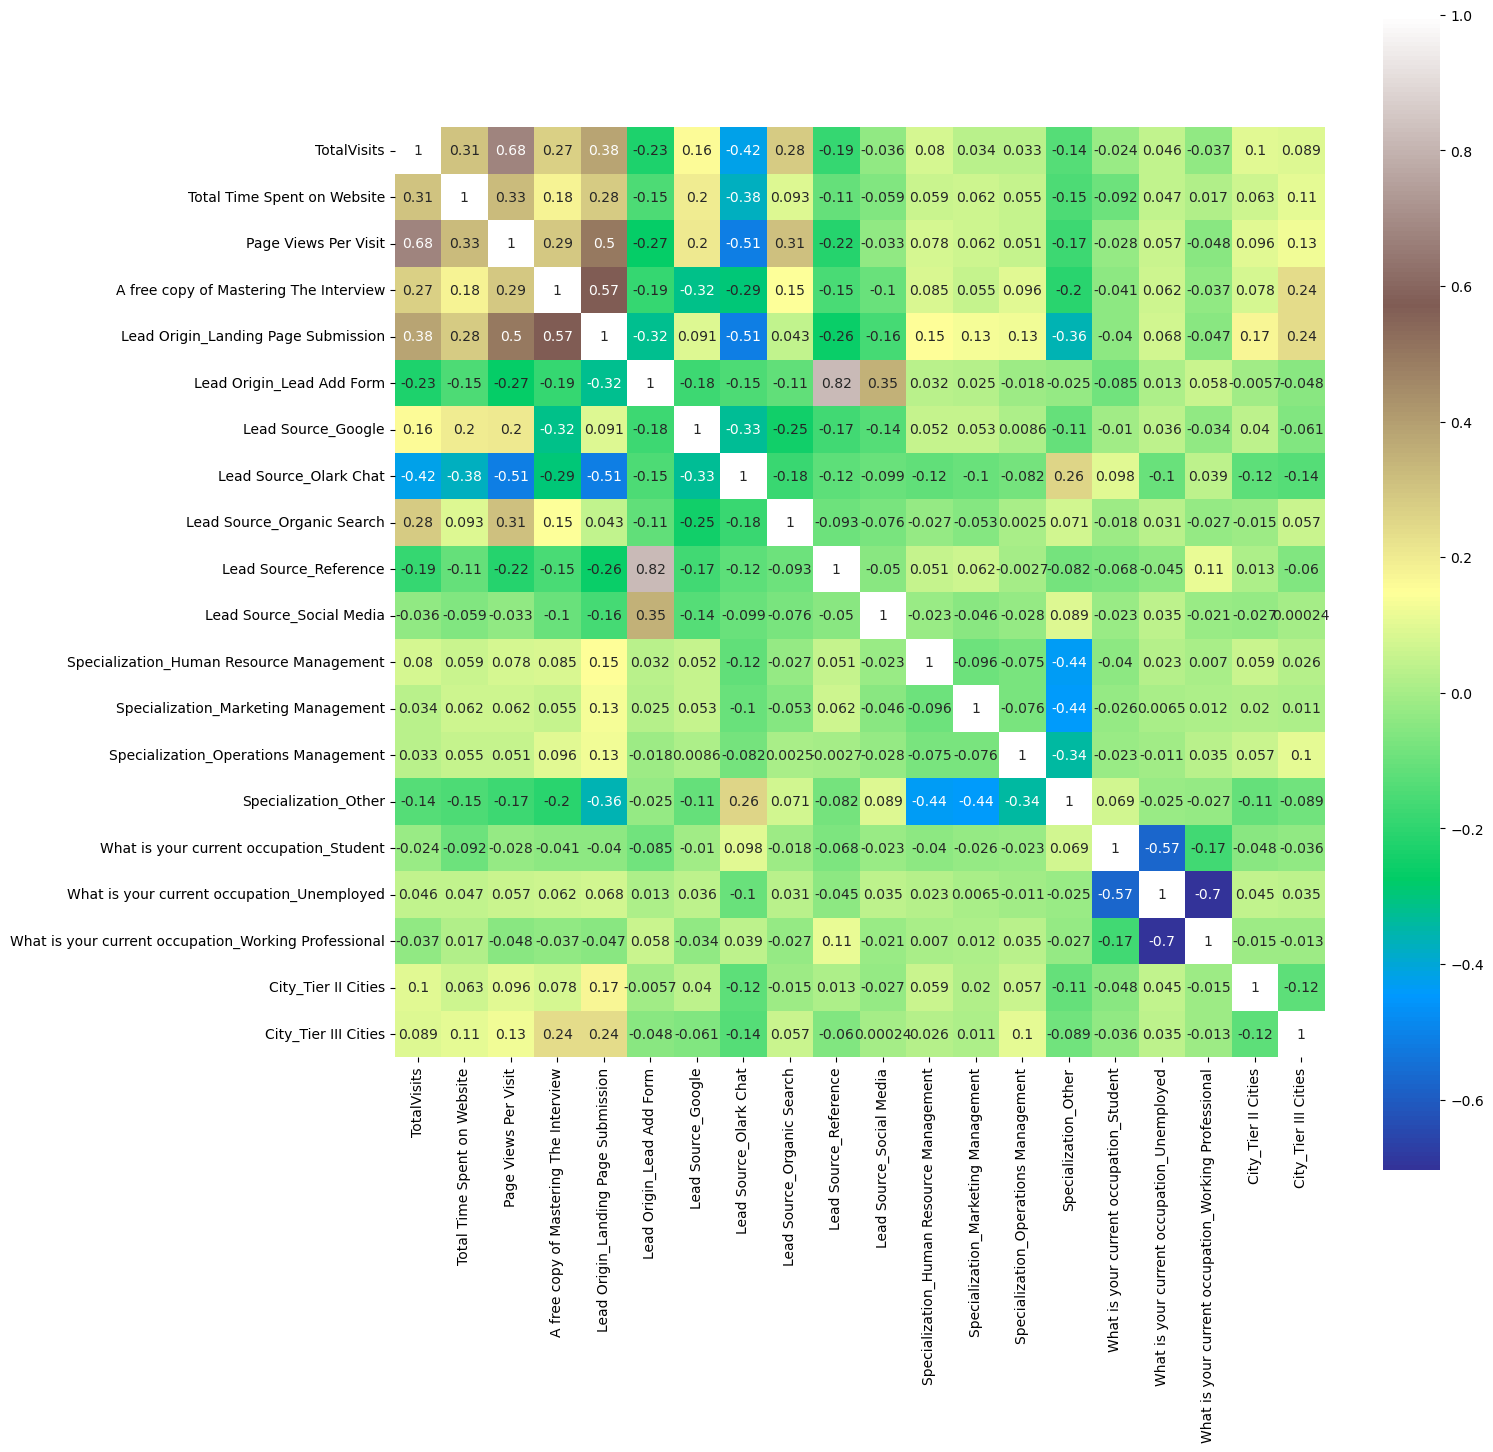

In [66]:
# Plot correlation map for the variables
plt.figure(figsize=(15, 15))
sns.heatmap(X_train.corr(), annot=True, square=True, cmap='terrain')
plt.show()

#### Inferences: Heatmap reveal the presence of multicollinearity among the columns 'TotalVisits', 'A free copy of Mastering The Interview', 'Lead Source_Organic Search', 'Lead Origin_Lead Add Form', and 'Lead Origin_Landing Page Submission'. To address this issue, it is necessary to eliminate these columns from the dataset. 

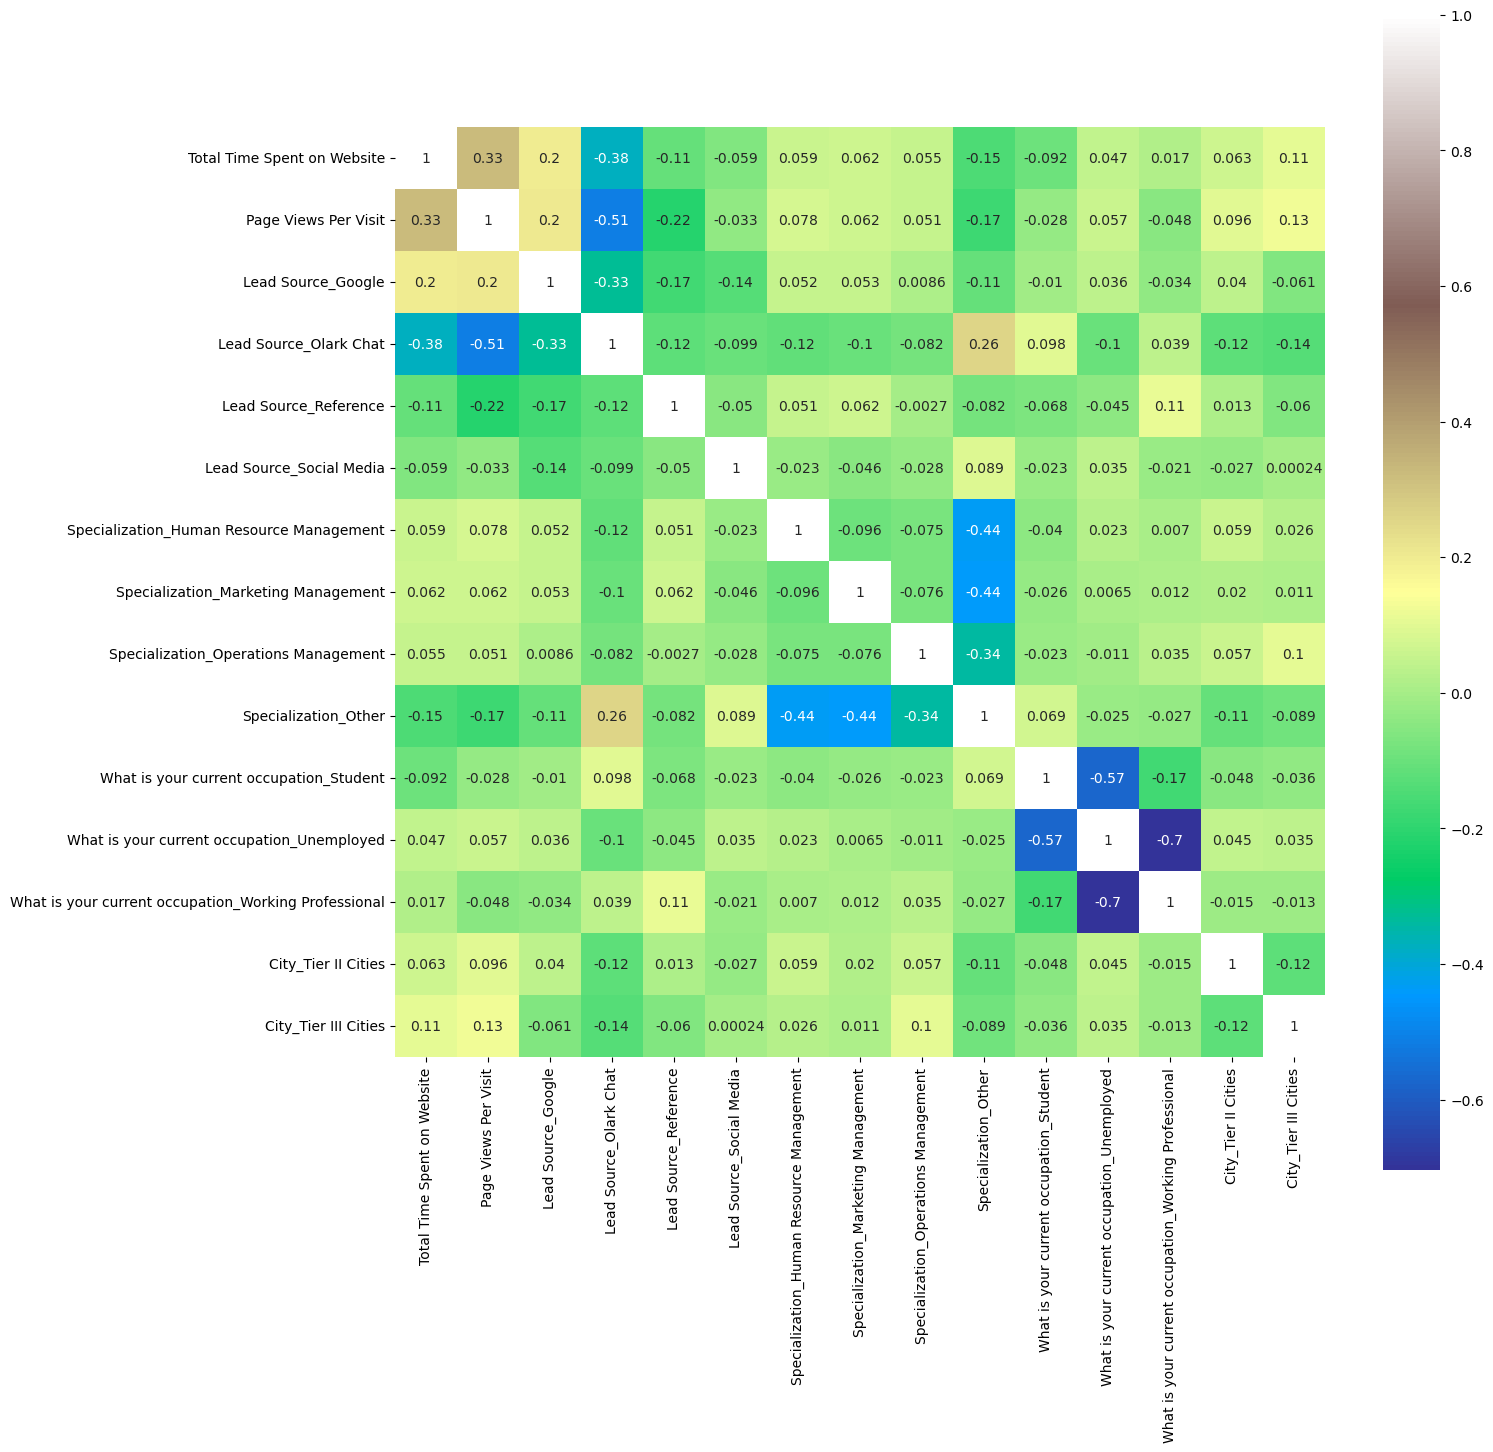

In [67]:
# Drop above columns to remove multicollinearity and plot correlation map again to verify
drop_columns = ['Lead Origin_Landing Page Submission', 'A free copy of Mastering The Interview',
             'Lead Source_Organic Search', 'TotalVisits', 'Lead Origin_Lead Add Form']
X_train.drop(drop_columns, axis = 1, inplace = True)
plt.figure(figsize=(15, 15))
sns.heatmap(X_train.corr(), annot=True, square=True, cmap='terrain')
plt.show()

### 8. Model Build 

In [68]:
#Now we generate a preliminary statistics of our model
model_data = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, model_data, family=sm.families.Binomial())
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3388.4
Date:                Mon, 19 Feb 2024   Deviance:                       6776.7
Time:                        16:08:07   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2475
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1825      0.579     -0.315      0.752      -1.316       0.951
Total Time Spent on Website                              4.2962      0.147     29.206      0.000       4.008       4.585
Page Views Per Visit                                    -1.1429      0.439     -2.605      0.009      -2.003      -0.283
Lead Source_Google                                       0.3329      0.071      4.678      0.000       0.193       0.472
Lead Source_Olark Chat                                   0.7657      0.108      7.062      0.000       0.553       0.978
Lead Source_Reference                                    3.8535      0.200     19.230      0.000       3.461       4.246
Lead Source_Social Media                                 1.6612      0.149     11.146      0.000       1.369       1.953
Specialization_Human Resource Management                -0.1352      0.136     -0.992      0.321      -0.402       0.132
Specialization_Marketing Management                      0.0808      0.136      0.593      0.553      -0.186       0.348
Specialization_Operations Management                     0.0653      0.155      0.422      0.673      -0.238       0.368
Specialization_Other                                    -0.2518      0.102     -2.476      0.013      -0.451      -0.053
What is your current occupation_Student                 -2.3399      0.575     -4.072      0.000      -3.466      -1.214
What is your current occupation_Unemployed              -1.4911      0.566     -2.632      0.008      -2.601      -0.381
What is your current occupation_Working Professional    -1.2349      0.570     -2.167      0.030      -2.352      -0.118
City_Tier II Cities                                      0.0284      0.105      0.271      0.786      -0.177       0.234
City_Tier III Cities                                     0.1981      0.093      2.123      0.034       0.015       0.381
========================================================================================================================
"""

### 9.1. Select Features using RFE method 

In [69]:
#Check RFE value
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [70]:
#Check the values in RFE
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [71]:
#Check on RFE ranks
[(col, sup, rank) for col, sup, rank in zip(X_train.columns, rfe.support_, rfe.ranking_)]

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Tier II Cities', True, 1),
 ('City_Tier III Cities', True, 1)]

In [72]:
#Creating attribute to save columns for iterating the model
col = X_train.columns[rfe.support_]

### 9.2. Validating the model

In [73]:
X_train_sm = sm.add_constant(X_train[X_train.columns[rfe.support_]])
model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3388.4
Date:                Mon, 19 Feb 2024   Deviance:                       6776.7
Time:                        16:08:07   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2475
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1825      0.579     -0.315      0.752      -1.316       0.951
Total Time Spent on Website                              4.2962      0.147     29.206      0.000       4.008       4.585
Page Views Per Visit                                    -1.1429      0.439     -2.605      0.009      -2.003      -0.283
Lead Source_Google                                       0.3329      0.071      4.678      0.000       0.193       0.472
Lead Source_Olark Chat                                   0.7657      0.108      7.062      0.000       0.553       0.978
Lead Source_Reference                                    3.8535      0.200     19.230      0.000       3.461       4.246
Lead Source_Social Media                                 1.6612      0.149     11.146      0.000       1.369       1.953
Specialization_Human Resource Management                -0.1352      0.136     -0.992      0.321      -0.402       0.132
Specialization_Marketing Management                      0.0808      0.136      0.593      0.553      -0.186       0.348
Specialization_Operations Management                     0.0653      0.155      0.422      0.673      -0.238       0.368
Specialization_Other                                    -0.2518      0.102     -2.476      0.013      -0.451      -0.053
What is your current occupation_Student                 -2.3399      0.575     -4.072      0.000      -3.466      -1.214
What is your current occupation_Unemployed              -1.4911      0.566     -2.632      0.008      -2.601      -0.381
What is your current occupation_Working Professional    -1.2349      0.570     -2.167      0.030      -2.352      -0.118
City_Tier II Cities                                      0.0284      0.105      0.271      0.786      -0.177       0.234
City_Tier III Cities                                     0.1981      0.093      2.123      0.034       0.015       0.381
========================================================================================================================
"""

#### Inference: In our analysis, it's evident that the p-value associated with City_Tier II Cities exceeds 0.05, indicating insignificance. As a result, we've decided to exclude the Specialization_Operations Management column from further consideration.

In [74]:
#Drop the column
col = col.drop('City_Tier II Cities')

In [75]:
#Print the list after dropping the column
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [76]:
#Lets rebuild and iterate the model again after changes
X_train_sm = sm.add_constant(X_train[col])
model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_3 = model_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3388.4
Date:                Mon, 19 Feb 2024   Deviance:                       6776.8
Time:                        16:08:07   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2475
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1771      0.578     -0.306      0.759      -1.310       0.956
Total Time Spent on Website                              4.2967      0.147     29.212      0.000       4.008       4.585
Page Views Per Visit                                    -1.1378      0.438     -2.597      0.009      -1.997      -0.279
Lead Source_Google                                       0.3325      0.071      4.673      0.000       0.193       0.472
Lead Source_Olark Chat                                   0.7637      0.108      7.061      0.000       0.552       0.976
Lead Source_Reference                                    3.8536      0.200     19.231      0.000       3.461       4.246
Lead Source_Social Media                                 1.6599      0.149     11.144      0.000       1.368       1.952
Specialization_Human Resource Management                -0.1348      0.136     -0.989      0.322      -0.402       0.132
Specialization_Marketing Management                      0.0802      0.136      0.588      0.556      -0.187       0.347
Specialization_Operations Management                     0.0666      0.155      0.430      0.667      -0.237       0.370
Specialization_Other                                    -0.2533      0.102     -2.494      0.013      -0.452      -0.054
What is your current occupation_Student                 -2.3422      0.575     -4.077      0.000      -3.468      -1.216
What is your current occupation_Unemployed              -1.4924      0.566     -2.635      0.008      -2.602      -0.382
What is your current occupation_Working Professional    -1.2364      0.570     -2.170      0.030      -2.353      -0.120
City_Tier III Cities                                     0.1942      0.092      2.107      0.035       0.014       0.375
========================================================================================================================
"""

#### Inference: It's evident that the p-value associated with the 'Specialization_Marketing Management' variable exceeds 0.05. Consequently, we opt to remove this column from consideration.

In [77]:
#Drop the column
col = col.drop('Specialization_Marketing Management')

In [78]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Human Resource Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [79]:
#Lets rebuild and iterate the model again after changes
X_train_sm = sm.add_constant(X_train[col])
model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_4 = model_4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3388.6
Date:                Mon, 19 Feb 2024   Deviance:                       6777.2
Time:                        16:08:07   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2475
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1337      0.574     -0.233      0.816      -1.259       0.991
Total Time Spent on Website                              4.2978      0.147     29.220      0.000       4.010       4.586
Page Views Per Visit                                    -1.1370      0.438     -2.595      0.009      -1.996      -0.278
Lead Source_Google                                       0.3331      0.071      4.682      0.000       0.194       0.473
Lead Source_Olark Chat                                   0.7655      0.108      7.079      0.000       0.554       0.977
Lead Source_Reference                                    3.8573      0.200     19.256      0.000       3.465       4.250
Lead Source_Social Media                                 1.6602      0.149     11.147      0.000       1.368       1.952
Specialization_Human Resource Management                -0.1717      0.121     -1.419      0.156      -0.409       0.065
Specialization_Operations Management                     0.0300      0.141      0.212      0.832      -0.247       0.307
Specialization_Other                                    -0.2902      0.080     -3.642      0.000      -0.446      -0.134
What is your current occupation_Student                 -2.3498      0.575     -4.087      0.000      -3.477      -1.223
What is your current occupation_Unemployed              -1.4999      0.567     -2.646      0.008      -2.611      -0.389
What is your current occupation_Working Professional    -1.2441      0.570     -2.182      0.029      -2.361      -0.127
City_Tier III Cities                                     0.1939      0.092      2.104      0.035       0.013       0.375
========================================================================================================================
"""

#### Inference: It's evident that the p-value associated with the 'Specialization_Human Resource Management' variable exceeds 0.05. Consequently, we opt to remove this column from consideration.

In [80]:
#Drop the column
col = col.drop('Specialization_Human Resource Management')

In [81]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Operations Management',
       'Specialization_Other', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [82]:
#Lets rebuild and iterate the model again after changes
X_train_sm = sm.add_constant(X_train[col])
model_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_5 = model_5.fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3389.6
Date:                Mon, 19 Feb 2024   Deviance:                       6779.2
Time:                        16:08:07   Pearson chi2:                 6.64e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2473
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1883      0.570     -0.330      0.741      -1.306       0.930
Total Time Spent on Website                              4.2940      0.147     29.221      0.000       4.006       4.582
Page Views Per Visit                                    -1.1424      0.438     -2.608      0.009      -2.001      -0.284
Lead Source_Google                                       0.3314      0.071      4.660      0.000       0.192       0.471
Lead Source_Olark Chat                                   0.7626      0.108      7.057      0.000       0.551       0.974
Lead Source_Reference                                    3.8503      0.200     19.233      0.000       3.458       4.243
Lead Source_Social Media                                 1.6540      0.149     11.113      0.000       1.362       1.946
Specialization_Operations Management                     0.0843      0.136      0.619      0.536      -0.183       0.351
Specialization_Other                                    -0.2357      0.070     -3.369      0.001      -0.373      -0.099
What is your current occupation_Student                 -2.3444      0.573     -4.094      0.000      -3.467      -1.222
What is your current occupation_Unemployed              -1.4967      0.565     -2.651      0.008      -2.603      -0.390
What is your current occupation_Working Professional    -1.2404      0.568     -2.185      0.029      -2.353      -0.128
City_Tier III Cities                                     0.1923      0.092      2.088      0.037       0.012       0.373
========================================================================================================================
"""

#### Inference: It's evident that the p-value associated with the 'Specialization_Operations Management' variable exceeds 0.05. Consequently, we opt to remove this column from consideration.

In [83]:
#Drop the column
col = col.drop('Specialization_Operations Management')

In [84]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [85]:
#Lets rebuild and iterate the model again after changes
X_train_sm = sm.add_constant(X_train[col])
model_6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_6 = model_6.fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3389.8
Date:                Mon, 19 Feb 2024   Deviance:                       6779.6
Time:                        16:08:07   Pearson chi2:                 6.64e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2472
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1801      0.570     -0.316      0.752      -1.297       0.937
Total Time Spent on Website                              4.2938      0.147     29.221      0.000       4.006       4.582
Page Views Per Visit                                    -1.1464      0.438     -2.617      0.009      -2.005      -0.288
Lead Source_Google                                       0.3302      0.071      4.645      0.000       0.191       0.470
Lead Source_Olark Chat                                   0.7622      0.108      7.054      0.000       0.550       0.974
Lead Source_Reference                                    3.8467      0.200     19.224      0.000       3.454       4.239
Lead Source_Social Media                                 1.6537      0.149     11.111      0.000       1.362       1.945
Specialization_Other                                    -0.2501      0.066     -3.793      0.000      -0.379      -0.121
What is your current occupation_Student                 -2.3378      0.572     -4.085      0.000      -3.460      -1.216
What is your current occupation_Unemployed              -1.4903      0.564     -2.642      0.008      -2.596      -0.385
What is your current occupation_Working Professional    -1.2323      0.567     -2.172      0.030      -2.344      -0.120
City_Tier III Cities                                     0.1963      0.092      2.136      0.033       0.016       0.376
========================================================================================================================
"""

#### Inference: It's evident that the p-value associated with the 'What is your current occupation_Working Professional' variable exceeds 0.05. Consequently, we opt to remove this column from consideration.

In [86]:
#Drop the column
col = col.drop('What is your current occupation_Working Professional')

In [87]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Tier III Cities'],
      dtype='object')

In [88]:
#Lets rebuild and iterate the model again after changes
X_train_sm = sm.add_constant(X_train[col])
model_7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_7 = model_7.fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3392.4
Date:                Mon, 19 Feb 2024   Deviance:                       6784.8
Time:                        16:08:07   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2466
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3909      0.115    -12.048      0.000      -1.617      -1.165
Total Time Spent on Website                    4.2968      0.147     29.255      0.000       4.009       4.585
Page Views Per Visit                          -1.1292      0.437     -2.583      0.010      -1.986      -0.272
Lead Source_Google                             0.3267      0.071      4.601      0.000       0.188       0.466
Lead Source_Olark Chat                         0.7602      0.108      7.039      0.000       0.549       0.972
Lead Source_Reference                          3.8441      0.200     19.217      0.000       3.452       4.236
Lead Source_Social Media                       1.6503      0.149     11.086      0.000       1.359       1.942
Specialization_Other                          -0.2507      0.066     -3.803      0.000      -0.380      -0.121
What is your current occupation_Student       -1.1271      0.123     -9.133      0.000      -1.369      -0.885
What is your current occupation_Unemployed    -0.2798      0.078     -3.596      0.000      -0.432      -0.127
City_Tier III Cities                           0.1965      0.092      2.139      0.032       0.016       0.376
==============================================================================================================
"""

#### Inference: Now we have only those columns whose p-value is less than 0.05.

### 9.3. Check VIF values 

In [89]:
#Check VIF values
vif_data = {'Features': X_train[col].columns,
            'VIF': [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]}
vif = pd.DataFrame(vif_data)
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)
vif

,Features,VIF
0,What is your current occupation_Unemployed,3.40
1,Specialization_Other,2.82
2,Page Views Per Visit,2.77
3,Total Time Spent on Website,2.01
4,Lead Source_Olark Chat,1.78
5,Lead Source_Google,1.65
6,What is your current occupation_Student,1.44
7,City_Tier III Cities,1.17
8,Lead Source_Social Media,1.11
9,Lead Source_Reference,1.09


#### Inference: As we can see that the VIF's for all columns is less than 5, it suggests that data is non-colinear.

### 9.4. Model Assesment 

In [90]:
# Predicting on training data
y_train_pred = model_7.predict(X_train_sm)
y_train_pred[:7]

7949    0.557858
1611    0.198960
6886    0.248696
1590    0.292891
907     0.497970
4348    0.655932
8425    0.238447
dtype: float64

In [91]:
# Reshaping the prediction array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:7]

array([0.55785752, 0.19896042, 0.24869642, 0.29289096, 0.49796999,
       0.65593227, 0.23844705])

In [92]:
# Creating DataFrame with 'Converted' and 'Converted_probability' columns and adding 'Cust_ID' column from y_train index
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_probability,Cust_ID
0,1,0.557858,7949
1,1,0.198960,1611
2,0,0.248696,6886
3,0,0.292891,1590
4,1,0.497970,907


In [93]:
# Sorting y_train_pred_final DataFrame by 'Converted_probability' column in descending order
y_train_pred_final.sort_values(by='Converted_probability', ascending=False, inplace=True)

# Displaying the top records of the sorted DataFrame
y_train_pred_final.head()

,Converted,Converted_probability,Cust_ID
2708,1,0.996820,6712
4368,1,0.996305,2656
5056,1,0.996061,3478
2738,1,0.995929,6647
5266,1,0.995761,6565


### 10. ROC Curve

#### Theory: The ROC curve serves to illustrate the delicate balance between sensitivity and specificity, highlighting that improvements in sensitivity often lead to a corresponding decrease in specificity. Furthermore, the accuracy of a test is reflected in how closely the curve adheres to the left and top boundaries of the ROC space. A closer alignment with these borders suggests higher accuracy. Conversely, as the curve approaches the 45-degree diagonal line within the ROC space, it indicates a decrease in test accuracy. Thus, the ROC curve provides valuable insights into the performance and trade-offs associated with different test thresholds. 

In [94]:
#Define function to plot ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

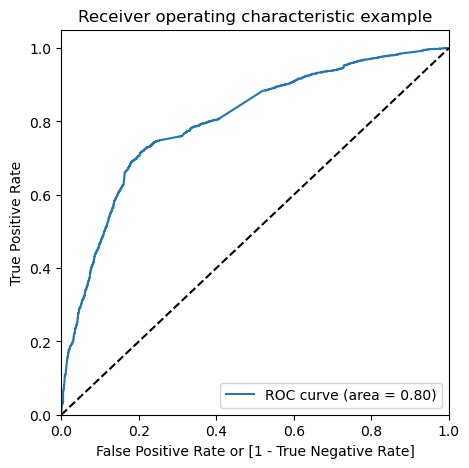

In [95]:
y_target = y_train_pred_final['Converted']
y_probability = y_train_pred_final['Converted_probability']
fpr, tpr, thresholds = metrics.roc_curve(y_target, y_probability, drop_intermediate=False)
draw_roc(y_target, y_probability)

#### Inference:The curve predominantly leans towards the left boundary, indicating high accuracy of our model. Approximately 80% of the total area is covered by the curve. 

### 11. Find optimal cutoff point

In [96]:
# Create 10 points out of which one we will choose for our cutoff point
numbers=[float(x)/10 for x in range(10)]  # Generate thresholds from 0 to 0.9 with step 0.1
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()

,Converted,Converted_probability,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2708,1,0.996820,6712,1,1,1,1,1,1,1,1,1,1
4368,1,0.996305,2656,1,1,1,1,1,1,1,1,1,1
5056,1,0.996061,3478,1,1,1,1,1,1,1,1,1,1
2738,1,0.995929,6647,1,1,1,1,1,1,1,1,1,1
5266,1,0.995761,6565,1,1,1,1,1,1,1,1,1,1


In [97]:
# Create empty dataframe
df_cutoffs = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

# List of probability cutoffs 
cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate through cutoffs
for probability in cutoffs:

  # Create confusion matrix
  cm = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[probability])
  
  # Calculate metrics
  total = cm.sum()
  accuracy = (cm[0,0] + cm[1,1]) / total
  sensitivity = cm[1,1] / (cm[1,0] + cm[1,1]) 
  specificity = cm[0,0] / (cm[0,0] + cm[0,1])

  # Append to dataframe
  df_cutoffs.loc[probability] = [probability, accuracy, sensitivity, specificity]

# Print dataframe  
print(df_cutoffs)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.385389     1.000000     0.000000
0.1          0.1  0.416654     0.996787     0.052883
0.2          0.2  0.586597     0.918474     0.378494
0.3          0.3  0.751896     0.744578     0.756485
0.4          0.4  0.768457     0.680723     0.823470
0.5          0.5  0.752360     0.571888     0.865525
0.6          0.6  0.732549     0.461847     0.902292
0.7          0.7  0.704071     0.328514     0.939562
0.8          0.8  0.674509     0.204819     0.969025
0.9          0.9  0.641387     0.080321     0.993201


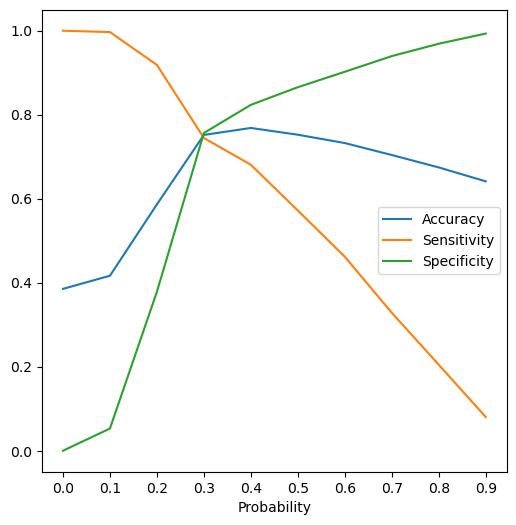

In [98]:
fig, ax = plt.subplots(figsize=(6, 6))
df_cutoffs.plot(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'], ax=ax)
ax.set_xticks(numbers)
plt.show()

In [99]:
# Calculate the sum of Accuracy, Sensitivity, and Specificity for each data point
df_cutoffs['Sum'] = df_cutoffs['Accuracy'] + df_cutoffs['Sensitivity'] + df_cutoffs['Specificity']

# Find the row where the sum is maximized
optimal_row = df_cutoffs.loc[df_cutoffs['Sum'].idxmax()]

# Get the x-value (Probability) where the curves converge
optimal_cutoff_probability = optimal_row['Probability']

print("\033[1mOptimal cutoff probability where all lines converge:\033[0m", optimal_cutoff_probability)

Optimal cutoff probability where all lines converge: 0.4


In [100]:
## Predicting the results by adding new columns to the final dataset and using a 0.4 probability cutoff.
y_train_pred_final['Predicted'] = np.where(y_train_pred_final['Converted_probability'] > 0.4, 1, 0)
y_train_pred_final.head()

,Converted,Converted_probability,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
2708,1,0.996820,6712,1,1,1,1,1,1,1,1,1,1,1
4368,1,0.996305,2656,1,1,1,1,1,1,1,1,1,1,1
5056,1,0.996061,3478,1,1,1,1,1,1,1,1,1,1,1
2738,1,0.995929,6647,1,1,1,1,1,1,1,1,1,1,1
5266,1,0.995761,6565,1,1,1,1,1,1,1,1,1,1,1


### 12. Determine Recall and Precision values for the model 

In [101]:
# Let's determine the precision and recall values of our model
confusion_pr = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
precision = confusion_pr[1, 1] / (confusion_pr[0, 1] + confusion_pr[1, 1]) * 100
recall = confusion_pr[1, 1] / (confusion_pr[1, 0] + confusion_pr[1, 1]) * 100

print('Precision Value is', precision)
print('Recall Value is', recall)

# Getting Sensitivity
sensitivity = confusion_pr[1, 1] / (confusion_pr[1, 1] + confusion_pr[1, 0])
print('Sensitivity (True Positive Rate) is', sensitivity * 100)

# Getting Specificity
specificity = confusion_pr[0, 0] / (confusion_pr[0, 0] + confusion_pr[0, 1])
print('Specificity (True Negative Rate) is', specificity * 100)

# Getting Accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print('Accuracy is', accuracy * 100)

Precision Value is 70.74290484140234
Recall Value is 68.07228915662651
Sensitivity (True Positive Rate) is 68.07228915662651
Specificity (True Negative Rate) is 82.3470158650214
Accuracy is 76.84568952174587


#### Inference: Our primary emphasis will be on maximizing the Recall value over Precision. This decision is driven by the goal of capturing as many potential leads as possible, prioritizing those who are likely to convert, rather than inadvertently overlooking them due to a lower probability of conversion.

## We can see that for the given training dataset, sensitivity is estimated to be 68.07%
## We can see that for the given training dataset, specificity is estimated to be 82.35%
## We can see that for the given training dataset, accuracy is estimated to be 76.85%

### 13. Determine Precision vs Recall Tradeoff for the model

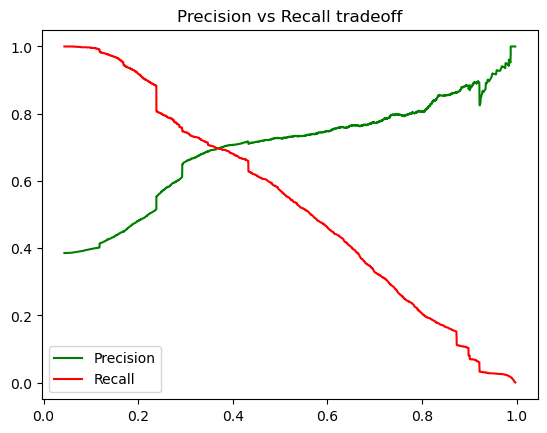

In [102]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)
plt.plot(thresholds, precision[:-1], "g-", label='Precision')  # Plotting precision
plt.plot(thresholds, recall[:-1], "r-", label='Recall')  # Plotting Recall
plt.title('Precision vs Recall tradeoff')
plt.legend()
plt.show()

In [103]:
# Calculate the difference between precision and recall
diff = precision - recall

# Find the index where the difference is closest to zero
optimal_index = np.argmin(np.abs(diff))

# Retrieve the corresponding threshold value
optimal_threshold = thresholds[optimal_index]

# Print the optimal threshold value
print("\033[1mThe optimum point for precision and recall tradeoff is:\033[0m", optimal_threshold)

The optimum point for precision and recall tradeoff is: 0.36888165904672043


### 14. Predictions

In [104]:
X_test[num_columns] = scaler.transform(X_test[num_columns]) 
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,City_Tier III Cities
1280,0.000000,0.000000,0,1,0,0,1,0,1,0
3269,0.000000,0.000000,0,1,0,0,1,0,1,0
5508,0.478433,0.291667,0,0,0,0,0,0,1,0
5814,0.096391,0.083333,0,0,0,0,1,0,1,0
7590,0.124120,0.458333,0,0,0,0,1,0,1,0


In [105]:
# Adding constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting y values
y_test_pred = model_7.predict(X_test_sm)

# Creating DataFrame for predicted y values
y_test_1 = pd.DataFrame(y_test_pred)

# Creating DataFrame for y_test
y_test_df = pd.DataFrame(y_test)
y_test_df['Cust_ID'] = y_test_df.index
y_test_df.reset_index(drop=True, inplace=True)

# Resetting index for y_test_1
y_test_1.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
y_pred_final = pd.concat([y_test_1, y_test_df], axis=1)

# Displaying first few rows of concatenated DataFrame
y_pred_final.head()

,0,Converted,Cust_ID
0,0.238447,0,1280
1,0.238447,0,3269
2,0.513917,0,5508
3,0.167800,0,5814
4,0.129477,0,7590


In [106]:
# Rename the column '0' to 'Converted_probability'
y_pred_final = y_pred_final.rename(columns={0: 'Converted_probability'})

# Select only the columns 'Cust_ID', 'Converted', and 'Converted_probability'
y_pred_final = y_pred_final[['Cust_ID', 'Converted', 'Converted_probability']]

# Create a new column 'Final_Predicted' based on the 'Converted_probability' column
# If 'Converted_probability' is greater than 0.4, set 'Final_Predicted' to 1, otherwise set it to 0
y_pred_final['Final_Predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.4 else 0)

# Sort the DataFrame by 'Converted_probability' column in descending order
y_pred_final = y_pred_final.sort_values(by='Converted_probability', ascending=False)

# Display the first few rows of the resulting DataFrame
y_pred_final.head()

,Cust_ID,Converted,Converted_probability,Final_Predicted
2644,639,1,0.996841,1
2395,3032,1,0.996260,1
1997,4123,1,0.995955,1
530,739,1,0.995360,1
840,8074,1,0.994580,1


In [107]:
y_pred_final['Score'] = (y_pred_final['Converted_probability'] * 100).round(2)
y_pred_final

,Cust_ID,Converted,Converted_probability,Final_Predicted,Score
2644,639,1,0.996841,1,99.68
2395,3032,1,0.996260,1,99.63
1997,4123,1,0.995955,1,99.60
530,739,1,0.995360,1,99.54
840,8074,1,0.994580,1,99.46
...,...,...,...,...,...
582,7864,0,0.054132,0,5.41
1599,2957,0,0.053470,0,5.35
460,2445,0,0.052134,0,5.21
1813,5151,0,0.050761,0,5.08


In [108]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'])
print("Confusion Matrix:")
print(confusion_mat)

# Calculate sensitivity
sensitivity_test = confusion_mat[1, 1] / confusion_mat[1].sum()
print("\nSensitivity (True Positive Rate):")
print(sensitivity_test * 100)

# Calculate specificity
specificity_test = confusion_mat[0, 0] / confusion_mat[0].sum()
print("\nSpecificity (True Negative Rate):")
print(specificity_test * 100)

# Calculate accuracy
accuracy_test = accuracy_score(y_pred_final['Converted'], y_pred_final['Final_Predicted'])
print("\nAccuracy:")
print(accuracy_test * 100)

Confusion Matrix:
[[1412  288]
 [ 333  737]]

Sensitivity (True Positive Rate):
68.87850467289721

Specificity (True Negative Rate):
83.05882352941177

Accuracy:
77.58122743682311


## We can see that for the given testing dataset, sensitivity is estimated to be 68.88%
## We can see that for the given testing dataset, specificity is estimated to be 83.06%
## We can see that for the given testing dataset, accuracy is estimated to be 77.58%

### 15. Final Remarks 

#### Key factors identified during the model training, contributing to a favorable conversion rate, include:
#### 1. Total time spent on the website.
#### 2. Lead source being referenced.
#### 3. Lead source originating from social media platforms.

#### The recall value surpasses the precision value, which is deemed satisfactory from a business perspective.

#### Upon evaluation with the test dataset, sensitivity, specificity, and accuracy metrics fall within acceptable thresholds compared to the training dataset.

#### The model exhibits adaptability to align with the specific requirements of the company.